# Clearing the dbfs environment & making it ready to accomodate new rdds

In [0]:
# Clear the cache
spark.catalog.clearCache()

### Checking that the zip files has been uploaded into the databricks filestore

In [0]:
dbutils.fs.ls("/FileStore/tables")

Out[14]: [FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1679077602000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677672176000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1679493827000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1675259217000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.zip', name='clinicaltrial_2019.zip', size=9707871, modificationTime=1681508911000)

### Coping the zip files into a temporary directory to be unzipped

In [0]:
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2019.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/pharma.zip", "file:/tmp/")

Out[15]: True

### Confirming the presence of the zip files in the temporary directory

In [0]:
%sh

ls /tmp/

Rserv
Rtmp3tXfis
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2019.zip
clinicaltrial_2020.zip
clinicaltrial_2021.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
systemd-private-6c61cf87aac74bbfac496cb5c1b923af-apache2.service-Li8A5g
systemd-private-6c61cf87aac74bbfac496cb5c1b923af-ntp.service-5v0s0e
systemd-private-6c61cf87aac74bbfac496cb5c1b923af-systemd-logind.service-DPomTf
systemd-private-6c61cf87aac74bbfac496cb5c1b923af-systemd-resolved.service-l2W6gf
tmp.hjJmPyIPaL


### Using the UNIX command "unzip" to extract the contents of the zipped file within the temporary directory

In [0]:
%sh

unzip -d /tmp/ /tmp/clinicaltrial_2019.zip
unzip -d /tmp/ /tmp/clinicaltrial_2020.zip
unzip -d /tmp/ /tmp/clinicaltrial_2021.zip
unzip -d /tmp/ /tmp/pharma.zip

Archive:  /tmp/clinicaltrial_2019.zip
  inflating: /tmp/clinicaltrial_2019.csv  
Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


### Using the UNIX command "ls" to confirm the zipped files has been successfully unzipped in temp directory

In [0]:
%sh

ls /tmp/clinicaltrial_2019.csv
ls /tmp/clinicaltrial_2020.csv
ls /tmp/clinicaltrial_2021.csv
ls /tmp/pharma.csv

/tmp/clinicaltrial_2019.csv
/tmp/clinicaltrial_2020.csv
/tmp/clinicaltrial_2021.csv
/tmp/pharma.csv


### Creating a directory for the unzipped files in the databricks filestore(dbfs)

In [0]:
dbutils.fs.mkdirs("/FileStore/tables/clinicaltrials_2019.csv")
dbutils.fs.mkdirs("/FileStore/tables/clinicaltrials_2020.csv")
dbutils.fs.mkdirs("/FileStore/tables/clinicaltrials_2021.csv")
dbutils.fs.mkdirs("/FileStore/tables/pharma.csv")

Out[19]: True

### Moving the unzipped files into the newly created dbfs directory

In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2019.csv", "/FileStore/tables/clinicaltrial_2019.csv", True)
dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "/FileStore/tables/clinicaltrial_2020.csv", True)
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "/FileStore/tables/clinicaltrial_2021.csv", True)
dbutils.fs.mv("file:/tmp/pharma.csv", "/FileStore/tables/pharma.csv", True)

Out[20]: True

### Confirming the unzipped files are now in the dbfs

In [0]:
dbutils.fs.ls("/FileStore/tables")

Out[21]: [FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1679077602000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677672176000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1679493827000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1675259217000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2019.csv', name='clinicaltrial_2019.csv', size=42400056, modificationTime=1681954908000

# Setup

In [0]:
# Importing necessary libraries for data visualization
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import json

# Setting the year to make the codes resuable by simply changing the year
year = "2021"

# Setting the directory
# Constructing the clinical data file path using the year variable
clinical_data_file_path = f"/FileStore/tables/clinicaltrial_{year}.csv"
pharma_data_file_path = "/FileStore/tables/pharma.csv"

# Making sure the data is in a table under the databrick filestore
try:
    dbutils.fs.ls(clinical_data_file_path)
    dbutils.fs.ls(pharma_data_file_path)
    print(f"clinicaltrial_{year}.csv & pharma.csv both exist in databricks filestore at the following path:")
    print(f"{clinical_data_file_path}")
    print(f"{pharma_data_file_path}")
    print("You\'re good to proceed")
except:
    print(f"clinicaltrial_{year}.csv does not exist in databricks filestore.")
    print(f"But pharma.csv exist in the databricks filestore at {pharma_data_file_path}")


clinicaltrial_2021.csv & pharma.csv both exist in databricks filestore at the following path:
/FileStore/tables/clinicaltrial_2021.csv
/FileStore/tables/pharma.csv
You're good to proceed


# Loading / Ingesting the datasets

### Clinical Data

In [0]:
# Read a text file from a path specified by 'clinical_data_file_path' and create an RDD called 'clinical_data'
clinical_data = sc.textFile(clinical_data_file_path)
# Retrieve all elements of the 'clinical_data' RDD and return them as a list to the driver program using the 'collect' action
clinical_data.take(5)

Out[11]: ['Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions',
 'NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||',
 'NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder,Autism Spectrum Disorder|',
 'NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus|',
 'NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis,Lung Diseases,Pulmonary Disease|']

### Pharma Data

In [0]:
# Read in the pharma data from the file path in the file store as a text file RDD
pharma_data = (sc.textFile(pharma_data_file_path) 
                .map(lambda line: line.split(",")) # Map each line of the RDD by splitting it at commas to create a list of values for each row
                .filter(lambda line: len(line) > 1) # Filter out any lines with less than two elements, i.e., incomplete or corrupt data
              )
# Collect the filtered data as a list of lists
pharma_data.take(5)

Out[12]: [['"Company"',
  '"Parent_Company"',
  '"Penalty_Amount"',
  '"Subtraction_From_Penalty"',
  '"Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting"',
  '"Penalty_Year"',
  '"Penalty_Date"',
  '"Offense_Group"',
  '"Primary_Offense"',
  '"Secondary_Offense"',
  '"Description"',
  '"Level_of_Government"',
  '"Action_Type"',
  '"Agency"',
  '"Civil/Criminal"',
  '"Prosecution_Agreement"',
  '"Court"',
  '"Case_ID"',
  '"Private_Litigation_Case_Title"',
  '"Lawsuit_Resolution"',
  '"Facility_State"',
  '"City"',
  '"Address"',
  '"Zip"',
  '"NAICS_Code"',
  '"NAICS_Translation"',
  '"HQ_Country_of_Parent"',
  '"HQ_State_of_Parent"',
  '"Ownership_Structure"',
  '"Parent_Company_Stock_Ticker"',
  '"Major_Industry_of_Parent"',
  '"Specific_Industry_of_Parent"',
  '"Info_Source"',
  '"Notes"'],
 ['"Abbott Laboratories"',
  '"Abbott Laboratories"',
  '"$5',
  '475',
  '000"',
  '"$0"',
  '"$5',
  '475',
  '000"',
  '"2013"',
  '"20131227"',
  '"government-contracting-related off

# Data Cleaning and Preparation

### Converting the clinical data into a list of list RDD

In [0]:
# Read a text file from a path specified by 'clinical_data_file_path' and create an RDD called 'clinical_data'
# The RDD will contain each line of the text file as an element
clinical_data = (sc.textFile(clinical_data_file_path) 
                  .map(lambda line: line.split("|")) # Applied a 'map' transformtion to the 'clinical_data' RDD to split each line using the '|' delimiter
                  .filter(lambda line: len(line) > 1)# Applied another 'filter' transformation to the 'clinical_data' RDD to remove any elements with less than 2 fields
                )
# Retrieve the first four elements (lines) from the 'clinical_data' RDD using the 'take' action
clinical_data.take(4)

Out[13]: [['Id',
  'Sponsor',
  'Status',
  'Start',
  'Completion',
  'Type',
  'Submission',
  'Conditions',
  'Interventions'],
 ['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  '']]

### Removing the clinical data header

In [0]:
# Retrieve the first element (line) from the 'clinical_data' RDD using the 'first' action
# The 'first' action returns the first element from the RDD as a string
clinical_data_header = clinical_data.first()

# Filter out the header row from the 'clinical_data' RDD using the 'filter' transformation and a lambda function
# The lambda function checks if each row is equal to the header row, and only keeps the rows that are not equal to the header row
clinical_data = clinical_data.filter(lambda row: row != clinical_data_header)

# Collect all the elements (rows) from the filtered 'clinical_data' RDD using the 'collect' action
# The 'collect' action returns an array with all the elements in the RDD
clinical_data.take(5)

Out[14]: [['NCT02758028',
  'The University of Hong Kong',
  'Recruiting',
  'Aug 2005',
  'Nov 2021',
  'Interventional',
  'Apr 2016',
  '',
  ''],
 ['NCT02751957',
  'Duke University',
  'Completed',
  'Jul 2016',
  'Jul 2020',
  'Interventional',
  'Apr 2016',
  'Autistic Disorder,Autism Spectrum Disorder',
  ''],
 ['NCT02758483',
  'Universidade Federal do Rio de Janeiro',
  'Completed',
  'Mar 2017',
  'Jan 2018',
  'Interventional',
  'Apr 2016',
  'Diabetes Mellitus',
  ''],
 ['NCT02759848',
  'Istanbul Medeniyet University',
  'Completed',
  'Jan 2012',
  'Dec 2014',
  'Observational',
  'May 2016',
  'Tuberculosis,Lung Diseases,Pulmonary Disease',
  ''],
 ['NCT02758860',
  'University of Roma La Sapienza',
  'Active, not recruiting',
  'Jun 2016',
  'Sep 2020',
  'Observational [Patient Registry]',
  'Apr 2016',
  'Diverticular Diseases,Diverticulum,Diverticulosis',
  '']]

### Cleaning the pharma data by removing redundant quotation marks, 
### replacing every pair of double or single quotes with just a single quote.

In [0]:
# Read in the pharmaceutical data from the file path in the file store as a text file RDD
c_pharma_data = (sc.textFile(pharma_data_file_path) 
                .map(lambda x: x.replace('"', '')) # Remove any double quotes that appear twice in a row, leaving just one.
                .map(lambda line: line.split(",")) # Map each line of the RDD by splitting it at commas to create a list of values for each row
                .filter(lambda line: len(line) > 1)# Filter out any lines with less than two elements, i.e., incomplete or corrupt data
                )
# Collect the filtered data as a list of lists
c_pharma_data.take(5)

Out[15]: [['Company',
  'Parent_Company',
  'Penalty_Amount',
  'Subtraction_From_Penalty',
  'Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting',
  'Penalty_Year',
  'Penalty_Date',
  'Offense_Group',
  'Primary_Offense',
  'Secondary_Offense',
  'Description',
  'Level_of_Government',
  'Action_Type',
  'Agency',
  'Civil/Criminal',
  'Prosecution_Agreement',
  'Court',
  'Case_ID',
  'Private_Litigation_Case_Title',
  'Lawsuit_Resolution',
  'Facility_State',
  'City',
  'Address',
  'Zip',
  'NAICS_Code',
  'NAICS_Translation',
  'HQ_Country_of_Parent',
  'HQ_State_of_Parent',
  'Ownership_Structure',
  'Parent_Company_Stock_Ticker',
  'Major_Industry_of_Parent',
  'Specific_Industry_of_Parent',
  'Info_Source',
  'Notes'],
 ['Abbott Laboratories',
  'Abbott Laboratories',
  '$5',
  '475',
  '000',
  '$0',
  '$5',
  '475',
  '000',
  '2013',
  '20131227',
  'government-contracting-related offenses',
  'False Claims Act and related',
  'kickbacks and bribery',
  "Abbott Labo

### Removing the cleaned pharma data header

In [0]:
# Get the header row of the pharma data
pharma_header = c_pharma_data.first()

# Filter out the header row from the pharma data
cl_pharma_data = c_pharma_data.filter(lambda row: row != pharma_header)

# Collect the cleaned pharma data
cl_pharma_data.take(5)

Out[16]: [['Abbott Laboratories',
  'Abbott Laboratories',
  '$5',
  '475',
  '000',
  '$0',
  '$5',
  '475',
  '000',
  '2013',
  '20131227',
  'government-contracting-related offenses',
  'False Claims Act and related',
  'kickbacks and bribery',
  "Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid",
  ' biliary and peripheral vascular products.',
  'federal',
  'agency action',
  'Justice Department Civil Division',
  'civil',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'USA',
  'Illinois',
  'publicly traded',
  'ABT',
  'pharmaceuticals',
  'pharmaceuticals',
  'https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians',
  ''],
 ['Abbott Laboratories Inc.',
  'AbbVie',
  '$1',
  '500',
  '000',
  '000',
  '$0',
  '$1',
  '500',
  '000',
  '000',
  '2012',
  '20120507',
  

# Question 1

#### What is the number of studies in the clinical data dataset?

In [0]:
# Having known that each of the list in the csv_rdd RDD contains a single entry which can also be inferred to be a study
# a count() method can be applied on the RDD to get the number of studies in the dataset.
clinical_data.count()

Out[17]: 387261

In [0]:
# To be explictly sure the result from the count() method above is distinct
# a distinct() and count() method can be applied respectively on the RDD
try:
    distinct_count = clinical_data.distinct().count()
except:
    print("Elements in RDD are not hashable, the distinct() method requires the elements in the RDD to be hashable, because it uses hash values to determine uniqueness")

Elements in RDD are not hashable, the distinct() method requires the elements in the RDD to be hashable, because it uses hash values to determine uniqueness


### Importing the clinical data again but as a list of tuples RDD

In [0]:
# To resolve the issue, the list of list RDD was converted into a list of tuples RDD, 
# where each tuple represents a row in the CSV file. Tuples are hashable in Python, 
# so we should be able to use the distinct() method on them.
distinct_rdd = sc.textFile(clinical_data_file_path) \
            .map(lambda line: tuple(line.split("|"))) \
            .filter(lambda line: len(line) > 1)
# Removing the header
header = distinct_rdd.first()
distinct_rdd = distinct_rdd.filter(lambda row: row != header)

In [0]:
# applying the distinct() and count() method to list of tuples RDD
distinct_count = distinct_rdd.distinct().count()

print(f"Distinct count of studies: {distinct_count}")

Distinct count of studies: 387261


## Defining a user-defined function
Solving the problems will require counting RDDs for each of the problems below. 
Therefore, a user-defined function was created to avoid repeating the same steps every time we need to count an RDD.

In [0]:
# Define a function that counts the occurrence of each value in an RDD
def count_values(rdd, top_n=None):
    
    """
    Args:
    rdd (RDD): The RDD to be worked on.
    num (int): The top values to return after sorting.
    
    Returns:
    sorted_rdd (list): The sorted RDD based on the num.
    """
    
    # Map each element (value) in the RDD to a tuple with the value and 1
    # Then group the tuples by key and sum the values
    # The result is an RDD with each unique value in the input RDD and its corresponding count
    result = rdd.map(lambda x: (x, 1)) \
                .groupByKey() \
                .mapValues(len)
    
    # Sort the RDD by the count of each value in descending order
    result = result.sortBy(lambda x: x[1], ascending=False)
    
    # Return the num values if specified, otherwise return all the values
    if top_n is None:
        sorted_rdd = result.collect()
    else:
        sorted_rdd = result.take(top_n)
    
    return sorted_rdd

# Question 2

### What are the types of studies in the dataset with their frequency?

In [0]:
# Extracting the "Type" column from the clinical data RDD using the header
Types = clinical_data.map(lambda col: col[clinical_data_header.index("Type")])

# Count the occurrence of each value in the "Type" column using the count_values function defined earlier
count_values(Types)


Out[22]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

# Question 3

### What are the top 5 conditions in the study with their frequency?

In [0]:
# Extracting the "Conditions" column 
Conditions = (clinical_data.map(lambda col: col[clinical_data_header.index("Conditions")])
        .filter(lambda x: x != "") # filtering out any empty values
        .flatMap(lambda x: x.split(',')) # Using flatMap to split individuals with multiple diseases into separate entities.
             )
# Count the occurrences of each condition and display the top 5 results
count_values(Conditions, 5)

Out[23]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

# Question 4

### Which companies are the top 10 most common sponsors that are not pharmaceutical companies?

In [0]:
# Extracting the Parent Company column from the cl_pharma_data RDD
Parent_Company = cl_pharma_data.map(lambda col: col[pharma_header.index("Parent_Company")])

# Extracting the Sponsor column from the clinical_data RDD
Sponsor = clinical_data.map(lambda col: col[clinical_data_header.index("Sponsor")])

# Using the subtract method to extract the sponsors that are not pharmaceutical companies
common_sponsors = Sponsor.subtract(Parent_Company)

# Using the countByValue method to get the resulting top 10 sponsors
top_sponsors = common_sponsors.countByValue()
top_sponsors = dict(sorted(top_sponsors.items(), key=lambda x: x[1], reverse=True)[:10])

# Converting the output to a dictionary and serializing it to JSON
json_output = json.dumps(top_sponsors)

# Printing the output in a serial format
for i, (key, value) in enumerate(top_sponsors.items()):
    print(f"{i+1}. \"{key}\": {value}")


1. "National Cancer Institute (NCI)": 3218
2. "M.D. Anderson Cancer Center": 2414
3. "Assistance Publique - Hôpitaux de Paris": 2369
4. "Mayo Clinic": 2300
5. "Merck Sharp & Dohme Corp.": 2243
6. "Assiut University": 2154
7. "Novartis Pharmaceuticals": 2088
8. "Massachusetts General Hospital": 1971
9. "Cairo University": 1928
10. "Hoffmann-La Roche": 1828


# Question 5

### How many studies were completed per month in 2021?

In [0]:
# Find the index of the "Status" and "Completion" columns in the clinical_data_header list
status_index = clinical_data_header.index("Status")
completion_index = clinical_data_header.index("Completion")

# Create a dictionary to map each month name to a corresponding numerical value,
# whose value represent the intended hierarchy of order
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Applying a series of transformations on the clinical_data RDD to extract the number of completed studies for each month of the year
result = clinical_data \
    .map(lambda x: [x[status_index], x[completion_index]]) \
    .filter(lambda x: x[0] == "Completed") \
    .map(lambda x: x[1]) \
    .filter(lambda x: x != "") \
    .map(lambda x: x.split()) \
    .filter(lambda x: x[1] == f"{year}") \
    .groupByKey() \
    .mapValues(len) \
    .sortBy(lambda x: month_dict[x[0]])

# Collect the result
result.collect()

Out[25]: [('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

### Visualizing the result

#### The data to be visualized

In [0]:
# The RDD of values to be plotted for each month
result.collect()

Out[26]: [('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

### Graphical representation of the studies completed per month in 2021

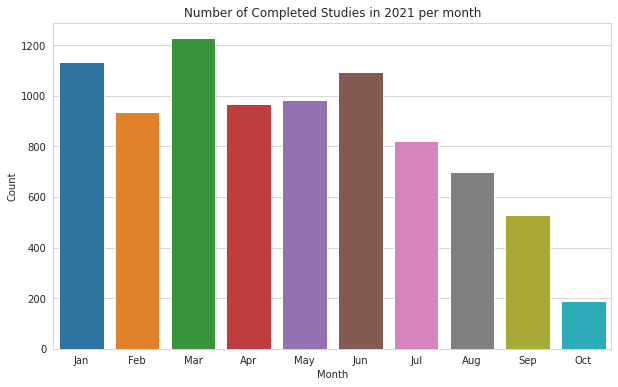

In [0]:
# Extracting the Month and Count data from the result RDD
Month = result.map(lambda x: x[0]).collect()
Count = result.map(lambda x: x[1]).collect()

# Creating a Pandas DataFrame from the Month and Count lists
df = pd.DataFrame({'Month': Month, 'Count': Count})

# Set the style of the plot using Seaborn
sns.set_style("whitegrid")

# Create a figure and set the size
plt.figure(figsize=(10, 6))

# Plot a bar chart using Seaborn
sns.barplot(x='Month', y='Count', data=df)

# Set the title and axis labels
plt.title(f'Number of Completed Studies in {year} per month')
plt.xlabel('Month')
plt.ylabel('Count')

# Display the plot
plt.show()

# Further Analysis

### What are the top 5 drug interventions in the studies?

In [0]:
# Extract the Interventions data from the clinical_data and split the values into a list
Interventions =clinical_data.map(lambda col: col[clinical_data_header.index("Interventions")])\
        .filter(lambda x: x != "")\
        .flatMap(lambda x: x.split(','))

# Count the occurrences of each value in the Interventions RDD and return the top 10 values
Interventions_result = count_values(Interventions, 5)

# Display the results
Interventions_result

Out[28]: [('Paclitaxel', 3225),
 ('Cyclophosphamide', 3012),
 ('Dexamethasone', 2516),
 ('Carboplatin', 2392),
 ('Antibodies', 2335)]

###  Visualizing the result

### A graphical representation of the top 5 drug interventions in the studies

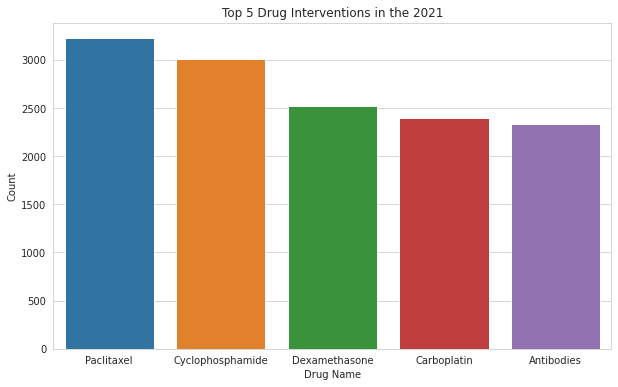

In [0]:
# Creating a Pandas DataFrame from the Interventions result list
df = pd.DataFrame(Interventions_result, columns=['Drug Name', 'Count'])

# Set the style of the plot using Seaborn
sns.set_style("whitegrid")

# Create a figure and set the size
plt.figure(figsize=(10, 6))

# Plot a bar chart using Seaborn
sns.barplot(x='Drug Name', y='Count', data=df)

# Set the title and axis labels
plt.title(f'Top 5 Drug Interventions in the {year}')
plt.xlabel('Drug Name')
plt.ylabel('Count')

# Display the plot
plt.show()